
# Project: Investigate a Dataset (TMDB Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set (cleaned from the original dataset on Kaggle) contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This dataset contains the following features-
  *  id - This is infact the movie_id as in the first dataset.
  *  imdb_id - A unique identifier for each movie.
  *  popularity - A numeric quantity specifying the movie popularity.
  *  budget - The budget in which the movie was made.
  *  revenue - The worldwide revenue generated by the movie.
  *  original_title - The title of the movie before translation or adaptation.
  *  cast - The name of lead and supporting actors.
  *  homepage - A link to the homepage of the movie.
  *  director - The name of Director
  *  tagline - Movie's tagline
  *  keywords - The keywords or tags related to the movie.
  *  overview - A brief description of the movie.
  *  runtime - The running time of the movie in minutes.
  *  genre - The genre of the movie, Action, Comedy ,Thriller etc.
  *  production_companies - The production house of the movie.
  *  release_date - The date on which movies were released.
  *  vote_count - the count of votes received.
  *  vote_average - average ratings the movie recieved.
  *  release_year - The year in which movies were released.
  *  budget_adj - the budget adjustment
  *  revenue_adj - the revenue adjustment
  
 ## Some of the questions answered in this Notebook are-
  ####   * Which genre is the most popular?
  ####   * What year was the most movie released?
  ####   * What are the top 10 production companies are making the most profit?
  ####   * What runtime of movies is most preferred?
  ####   * What is the relationship between popularity and the revenue of a movie?
> 

In [107]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [108]:
# Loading data 
df = pd.read_csv(r"C:\Users\CLOUDVIEW\Downloads\ALX Udacity\tmdb-movies.csv")

In [109]:
# View the first two rows of the data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [110]:
#print the last two rows of the dataset
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### Observation From The Dataset

####  The Currency for columns 'budget', 'revenue', 'budget_adj', 'revenue_adj' has not given. But for this dataset i will assume the currency is in US dollor.

In [111]:
#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [112]:
#number of rows and columns
print("The rows and column in this dataset are (Rows,Columns) : ",df.shape)

The rows and column in this dataset are (Rows,Columns) :  (10866, 21)


## Data Cleaning 

### Information That We Need To Delete Or Modify
    1. We need to remove duplicate rows from the dataset
    2. Drop columns that are not needed in the analysis process
    3. Format strings with '|' to a list

In [113]:
# The data has 10866 rows and 21 columns
# drop columns that are not needed

df.drop(['imdb_id','homepage','release_date'], axis = 1, inplace = True)


In [114]:
#count total rows in each column which contain null values
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [115]:
# Count total missing values in the dataframe
df.isnull().sum().sum()

5494

In [116]:
#drop missing values
df.dropna(inplace=True)

In [117]:
#check for missing values by column
df.isna().any() #this will return missing rows as True and other as False

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [118]:
#number of duplicates in the data
df.duplicated().sum()

1

In [119]:
# drop duplicated rows
print('Number of duplicated rows originally: ', df.duplicated().sum()) #check for duplicated rows
df.drop_duplicates(inplace = True) #drop duplicates
print('Number of duplicated rows after: ', df.duplicated().sum()) #check to see if there are still duplicates
#after removing duplicate values from the dataset
print("After Removing Duplicate Values (Rows,Columns) : ",df.shape)

Number of duplicated rows originally:  1
Number of duplicated rows after:  0
After Removing Duplicate Values (Rows,Columns) :  (7031, 18)


In [120]:
#format strings with '|' to a list
cols = ['cast', 'genres', 'keywords', 'production_companies']
for column in cols:
    df[column] = df[column].apply(lambda x: x.split("|"))


In [121]:
#generate descriptive statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7031.000000,7031.000000,7.031000e+03,7.031000e+03,7031.000000,7031.000000,7031.000000,7031.000000,7.031000e+03,7.031000e+03
mean,51930.810411,0.829496,2.084295e+07,5.932460e+07,104.839994,312.713128,6.013384,1999.382307,2.500879e+07,7.644145e+07
std,81407.049737,1.180266,3.602356e+07,1.404161e+08,23.804709,693.227171,0.876495,13.468579,3.953511e+07,1.730470e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9540.500000,0.278563,0.000000e+00,0.000000e+00,92.000000,24.000000,5.500000,1992.000000,0.000000e+00,0.000000e+00
50%,14741.000000,0.506241,5.000000e+06,4.858139e+06,101.000000,73.000000,6.100000,2003.000000,6.951084e+06,6.448898e+06
75%,46983.500000,0.956339,2.600000e+07,5.472242e+07,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.526298e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### To EDA process will begin with simple 1 dimensional analysis


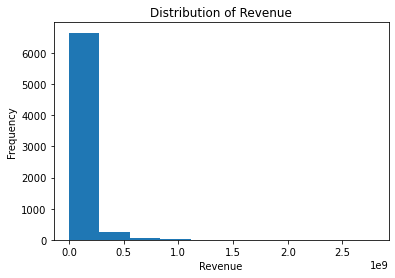

In [122]:
#plot a histogram, give the x and y axis appropriate labels and give a descriptive chart title 
df[ "revenue"].plot(kind = 'hist')
plt.xlabel("Revenue") 
plt.ylabel("Frequency")
plt.title("Distribution of Revenue");

#### Revenue is positively skewed and that implies that there are more movies with low revenue

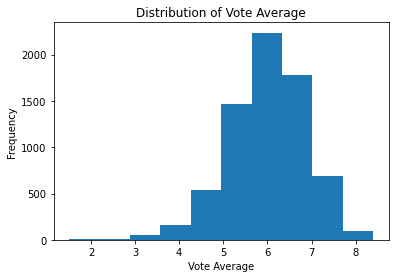

In [123]:
#plot a histogram, give the x and y axis appropriate labels and give a descriptive chart title 
df[ "vote_average"].plot(kind = 'hist')
plt.xlabel("Vote Average") 
plt.ylabel("Frequency") 
plt.title("Distribution of Vote Average");

#### Vote average is negatively skewed which means there are more high vote averages than there are less vote averages

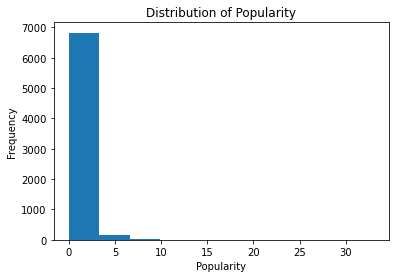

In [124]:
#plot a histogram, give the x and y axis appropriate labels and give a descriptive chart title
df["popularity"].plot(kind = 'hist')
plt.xlabel("Popularity") 
plt.ylabel("Frequency")  
plt.title("Distribution of Popularity");

#### Popularity is positively skewed and that implies that there are more movies with low popularity

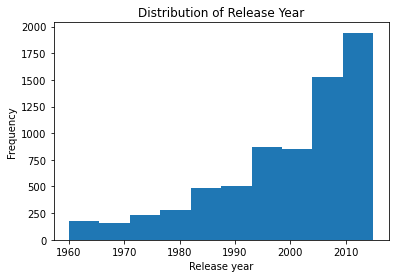

In [125]:
#plot a histogram, give the x and y axis appropriate labels and give a descriptive chart title
df["release_year"].plot(kind = 'hist')
plt.xlabel("Release year") 
plt.ylabel("Frequency") 
plt.title("Distribution of Release Year");  

#### This shows that more movies are released every year

### Research Question 1 (What genre of movie is the most popular?)

In [126]:
#creating a new dataframe 'pop' that contains 4 columns
pop = df[['genres','revenue','runtime','popularity','vote_average']]
#exploding genres column because it is a list-like column
pop = pop.explode('genres', ignore_index = False) 
#grouping by genres and find the sum of each other column and putting them in dataframe called agg
agg = pop.groupby('genres')[['revenue','runtime','popularity','vote_average']].sum()
agg

,revenue,runtime,popularity,vote_average
genres,,,,
Action,170128589413,188940,1983.459793,10324.3
Adventure,162140787198,119217,1546.694423,6573.8
Animation,50611436598,29507,440.154111,2331.9
Comedy,135431711313,250054,1862.520786,14937.4
Crime,55175718643,114698,893.750050,6561.6
Documentary,888100128,15898,38.657472,1095.2
Drama,131847253548,349029,2283.224109,19470.4
Family,86040273124,70370,770.621218,4507.4
Fantasy,85953899789,66366,798.536130,3807.2


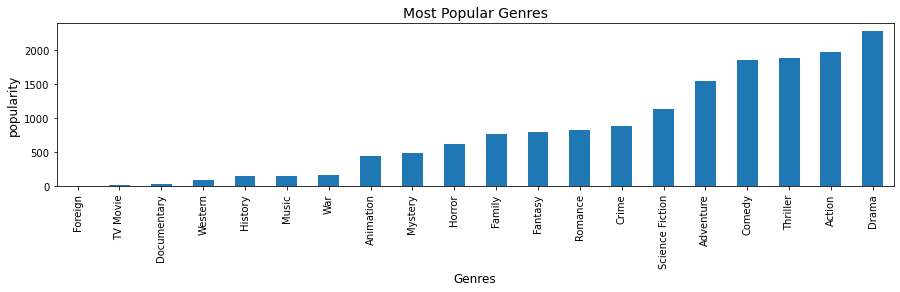

In [127]:
#plot bar chart, give the x and y axis appropriate labels and give a descriptive chart title
popular = agg.sort_values('popularity')
popular['popularity'].plot(kind="bar",figsize = (15,3))
plt.title('Most Popular Genres',fontsize =14)
plt.xlabel('Genres',fontsize = 12) 
plt.ylabel('popularity',fontsize = 12); 


#### Drama movies are the most popular movies while foreign movies are the least popular movies

### Research Question 2  (In what year was the most movie released?)

In [152]:
fig, ax = plt.subplots(figsize=(10,10))
# x and y are lists
sns.countplot(x= df.release_year, ax=ax, label="Some Label")
ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')
plt.show();


AttributeError: 'tuple' object has no attribute 'subplots'

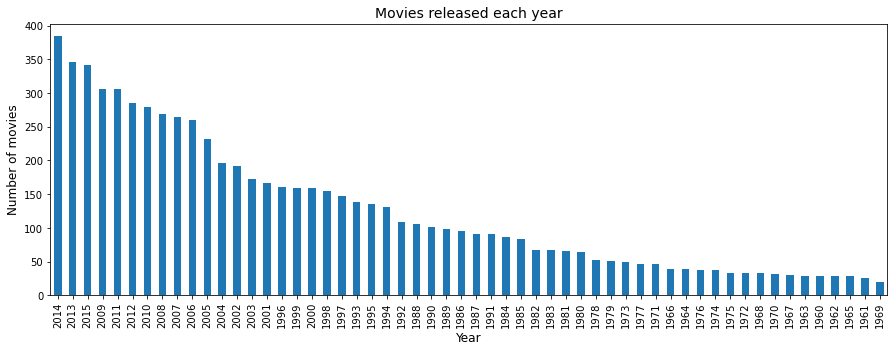

In [97]:
#plot bar chart, give the x and y axis appropriate labels and give a descriptive chart title
df.release_year.value_counts().plot(kind ='bar',figsize = (15,5))
plt.xlabel('Year',fontsize = 12) 
plt.ylabel('Number of movies',fontsize = 12)      
plt.title("Movies released each year",fontsize = 14); 

#### 2014 was the year with the most movie release

### Research Question 3  (What are the top 10 production companies are making the most profit?)

In [94]:
#create a new dataframe called df_prod that contains revenue and production_companies 
df_prod = df[['revenue','production_companies']]
#explode production_companies column
df_prod = df_prod.explode('production_companies') 
#find the sum of each production company
most_rev = df_prod.groupby('production_companies')['revenue'].sum().sort_values(ascending = False).head(10) 

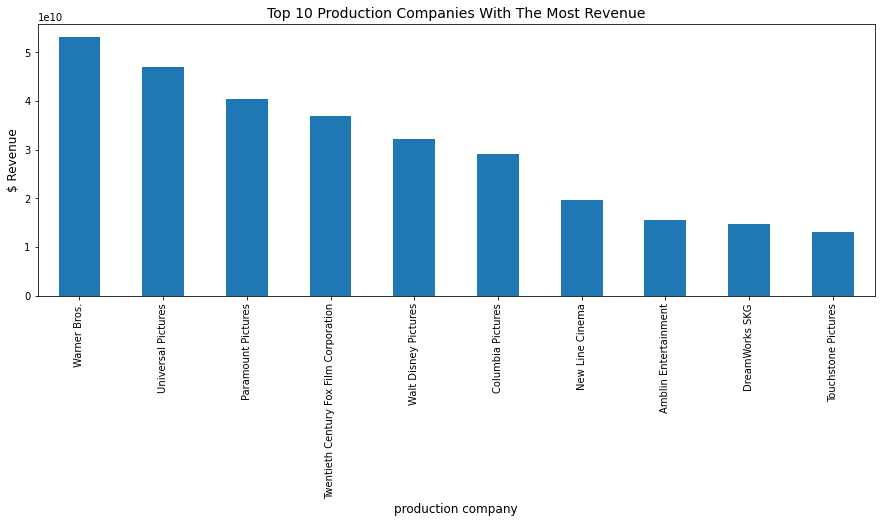

In [98]:
#plot bar chart, give the x and y axis appropriate labels and give a descriptive chart title
most_rev.plot(kind='bar',figsize=(15,5));
plt.title("Top 10 Production Companies With The Most Revenue",fontsize = 14) 
plt.xlabel('production company',fontsize = 12) 
plt.ylabel('$ Revenue',fontsize = 12); 

#### Warner Bros is the company with the highest revenue

### Research Question 4  (Who are the top 10 Directors?)

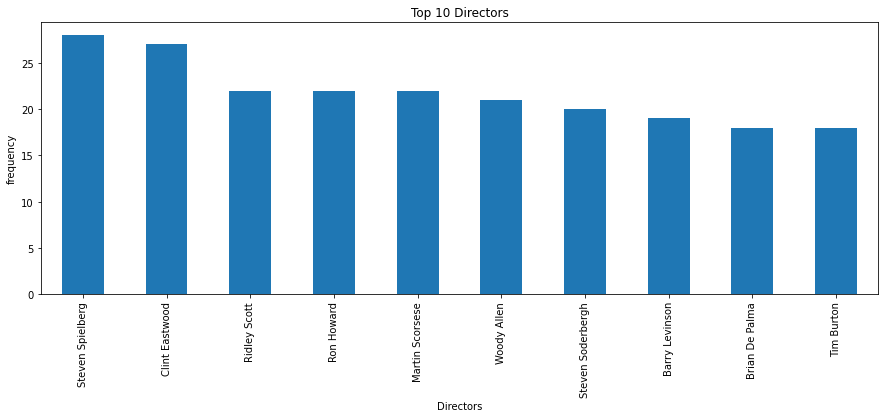

In [32]:
#use the value counts to count occurrence of each director and the head to limit the graph to top 10, then plot a bar graph
df['director'].value_counts().head(10).plot(kind='bar', ylabel='frequency', xlabel = 'Directors',
                                            title='Top 10 Directors',figsize = (15,5));

#### Steven Spielberg is the top director

### Research Question 4  (What is the runtime of movies is most preferred according to their popularity?)

Text(0, 0.5, 'Average Popularity')

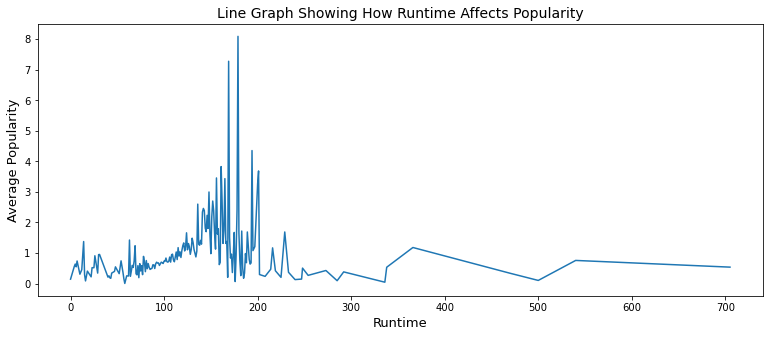

In [93]:
#make a plot using their popularity and find which length movies are most popular.
#give the x and y axis appropriate labels and give a descriptive chart title

#make the group of the data according to their runtime and find the mean popularity 
df.groupby('runtime')['popularity'].mean().plot(kind = 'line' ,figsize = (13,5))
plt.title("Line Graph Showing How Runtime Affects Popularity",fontsize = 14) 
plt.xlabel('Runtime',fontsize = 13) 
plt.ylabel('Average Popularity',fontsize = 13); 

#### According to the plot we can see that movies in the range of 100-200 runtime are more popular than other runtime 

### Research Question 5  (What is the correlation between budget and revenue and vote average and release year? How does the popularity of a movie affect its revenue?)


In [26]:
#correlation table
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.059001,-0.101641,-0.067851,-0.082703,0.012479,-0.091744,0.484502,-0.161177,-0.119847
popularity,0.059001,1.000000,0.521981,0.653280,0.189413,0.798939,0.272979,0.169882,0.486096,0.594809
budget,-0.101641,0.521981,1.000000,0.725662,0.249326,0.618222,0.100464,0.217755,0.967213,0.602990
revenue,-0.067851,0.653280,0.725662,1.000000,0.220666,0.782714,0.217408,0.128270,0.696864,0.915085
runtime,-0.082703,0.189413,0.249326,0.220666,1.000000,0.227124,0.260809,-0.103767,0.293687,0.239720
vote_count,0.012479,0.798939,0.618222,0.782714,0.227124,1.000000,0.320417,0.182409,0.569737,0.695303
vote_average,-0.091744,0.272979,0.100464,0.217408,0.260809,0.320417,1.000000,-0.128344,0.115151,0.244492
release_year,0.484502,0.169882,0.217755,0.128270,-0.103767,0.182409,-0.128344,1.000000,0.111404,-0.013536
budget_adj,-0.161177,0.486096,0.967213,0.696864,0.293687,0.569737,0.115151,0.111404,1.000000,0.630160
revenue_adj,-0.119847,0.594809,0.602990,0.915085,0.239720,0.695303,0.244492,-0.013536,0.630160,1.000000


In [38]:
#plot a scatter plot between two variables
#give the x and y axis appropriate labels and give a descriptive chart title
def plotScatter(df, x, y):
    plt.figure(figsize = (10,6));
    plt.scatter(df[x], df[y]);
    x = x.replace('_', ' ').title()
    y = y.replace('_', ' ').title()
    plt.xlabel(x, fontsize = 12);
    plt.ylabel(y, fontsize = 12);
    plt.title(f'Scatterplot showing correlation between {x} and {y}', fontsize = 14)
    

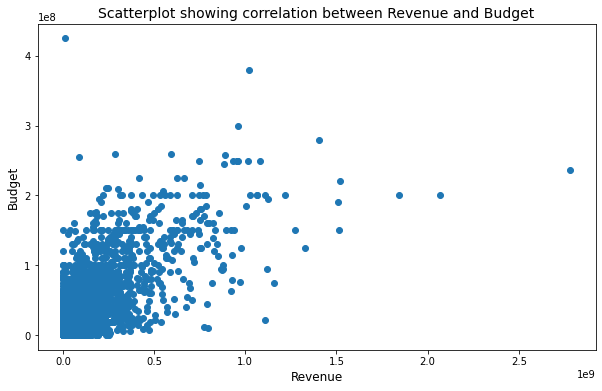

In [41]:
plotScatter(df, 'revenue', 'budget')

#### Budget and revenue both have positive correlation. This implies that there is a high probabilty that movies with higher budgets result in better revenues.

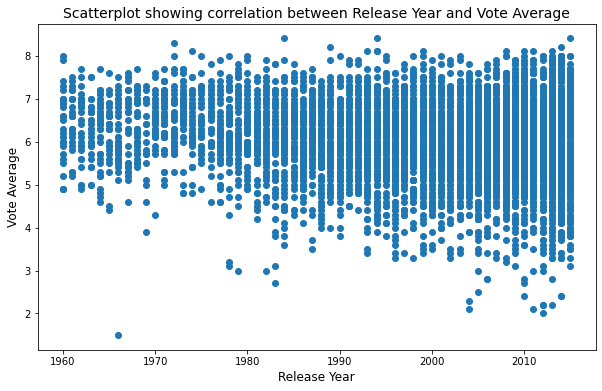

In [40]:
plotScatter(df, 'release_year', 'vote_average')

#### Release year and vote Average have negative correlation. This implies that vote average does not depends on the release year.

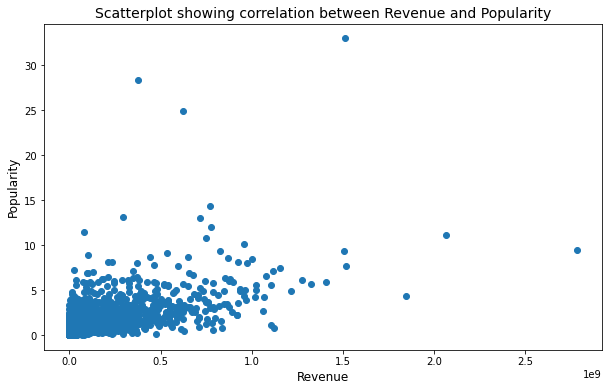

In [42]:
plotScatter(df, 'revenue', 'popularity')

#### Popularity and revenue have positive correlation. It means that movies with high popularity is likely to have high revenue.

<a id='conclusions'></a>
## Conclusions

#### 1. Drama is the most popular genre, following by action, thriller and comedy.
#### 2. Maximum number of released movies was in the year 2014.
#### 3. Warner Bros is the production company that made the most revenue highest revenue
#### 4. Movies in the range of 100-200 runtime are more popular than other runtime as it might be boring to see movies with longer runtime



### Limitations

#### 1. The data had missing values
#### 2. The data contained duplicates


### Resources used

####  Medium
####  Stackoverflow
